In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [40]:
df = pd.read_csv('Match_History_Details.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [41]:
df.head()

,GameId,Duration,Team1_Barons,Team1_Dragons,Team2_Barons,Team2_Dragons,Team1_Player1_Champion,Team1_Player2_Champion,Team1_Player3_Champion,Team1_Player4_Champion,...,Team1_Player1_Lane,Team1_Player2_Lane,Team1_Player3_Lane,Team1_Player4_Lane,Team1_Player5_Lane,Team2_Player1_Lane,Team2_Player2_Lane,Team2_Player3_Lane,Team2_Player4_Lane,Team2_Player5_Lane
0,3084513429,1540,0,0,1,2,86,37,268,81,...,TOP,BOTTOM,MIDDLE,BOTTOM,JUNGLE,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM
1,3084446759,1642,0,4,1,0,99,29,23,113,...,BOTTOM,BOTTOM,TOP,JUNGLE,MIDDLE,BOTTOM,JUNGLE,JUNGLE,MIDDLE,BOTTOM
2,3084435694,1046,0,0,0,2,30,134,236,80,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,3083216368,1614,0,1,1,3,92,4,9,246,...,TOP,MIDDLE,BOTTOM,JUNGLE,BOTTOM,BOTTOM,JUNGLE,MIDDLE,BOTTOM,TOP
4,3083201609,1444,1,2,0,0,15,350,113,61,...,BOTTOM,BOTTOM,JUNGLE,MIDDLE,TOP,JUNGLE,BOTTOM,TOP,MIDDLE,BOTTOM


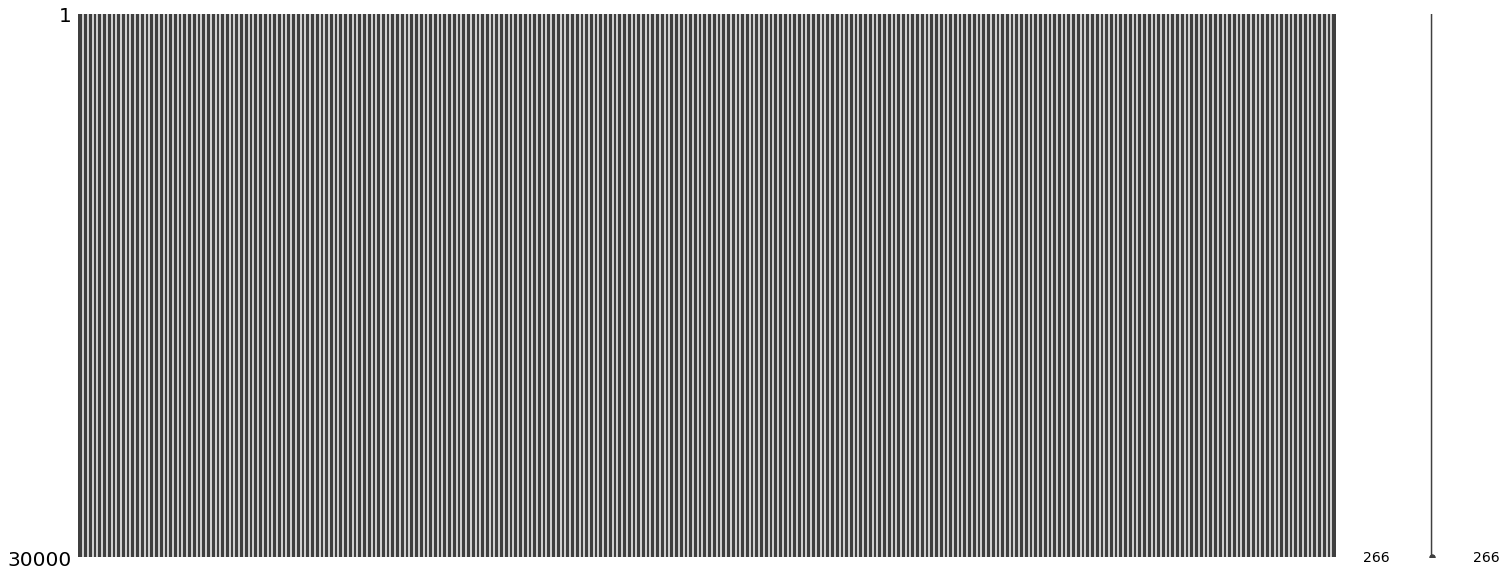

In [15]:
# To see if I am missing any info in my data, I use MissingNo to validate I have all the info in my data
msno.matrix(df)

# In order to assess the playstyles of the different lanes, I am going to use K-Means clustering for each lane

Creating a function to pull out the necessary columns to cluster on for each lane. Since each lane contains 10 players, I am going to iterate through each player column to pull up the necessary info and overlay all the info into consolidated columns

In [87]:
def lane(lane_name):
    players = ['Team1_Player1', 'Team1_Player2', 'Team1_Player3', 'Team1_Player4', 'Team1_Player5',
              'Team2_Player1', 'Team2_Player2', 'Team2_Player3', 'Team2_Player4', 'Team2_Player5']

    df2 = pd.DataFrame()
    for player in players:
        rift = df.query("{}_Lane == '{}'".format(player, lane_name))[
            ['{}_Lane'.format(player), '{}_Summoner'.format(player), '{}_Champion'.format(player),
            '{}_Kills'.format(player), '{}_Deaths'.format(player),'{}_Assists'.format(player), 
             '{}_Killing_Spree'.format(player), '{}_Multikills'.format(player), '{}_Total_Damage'.format(player),
             '{}_Damage_To_Objectives'.format(player), ''
             '{}_Item0'.format(player),'{}_Item1'.format(player), '{}_Item3'.format(player),
             '{}_Item4'.format(player), '{}_Item5'.format(player), '{}_Item6'.format(player)]]
        rift.rename(columns = {"{}_Lane".format(player): "Lane", 
                              "{}_Champion".format(player): "Champion",
                              "{}_Summoner".format(player): "Summoner",
                              "{}_Kills".format(player): "Kills",
                              "{}_Deaths".format(player): "Deaths", 
                              "{}_Assists".format(player): "Assists", 
                              "{}_Item0".format(player): "Item_0",
                              "{}_Item1".format(player): "Item_1",
                              "{}_Item2".format(player): "Item_2",
                              "{}_Item3".format(player): "Item_3",
                              "{}_Item4".format(player): "Item_4",
                              "{}_Item5".format(player): "Item_5",
                              "{}_Item6".format(player): "Item_6",}, inplace = True)
        df2 = pd.concat([df2,rift])
    return df2

In [88]:
"{}_Lane == '{}'".format('Team1_Player1', str("MIDDLE"))

"Team1_Player1_Lane == 'MIDDLE'"

In [89]:
lane('MIDDLE')

,Lane,Summoner,Champion,Kills,Deaths,Assists,Item_0,Item_1,Item_3,Item_4,Item_5,Item_6
12,MIDDLE,FmLy7ZnFG4rASusicbskDIxXnmKqnZroa1pjxQHSpB1PIQ,68,6,5,4,0,2031,3020,3151,1054,3364
13,MIDDLE,eBir9AyELV8P4RlW7v3y-SPnKMFCIqm_bhpa4sZarocTI08,4,4,8,8,3111,2031,2421,3100,0,3340
18,MIDDLE,CdvbZGOaUL2ZdkQ2q_sN7Dfj6U-j43AIvQNMfgxYz5E26X...,163,7,11,2,3117,3151,1082,3165,3285,3340
23,MIDDLE,8mxGxOaBn8_NieSC3zfSK-qFSrYI7GnTqF2GZBo8x9ex_vI,39,4,7,3,3078,2033,3047,3053,3052,3363
28,MIDDLE,OnvXwXtBoDG_huG715XZ1WsxiLhO4_n8QfI5lvuXvZZ1qx...,27,1,2,9,2033,3512,1056,3116,3047,3340
40,MIDDLE,NPSBiM66QZlfpSbjh1P-h6LiMI6hALoaiawz1WSRya_mCuI,142,3,0,3,2033,3285,3907,3020,0,3340
57,MIDDLE,P4GGThIHNrJdpACaqEqQR2Miz-CFtB1QxwVDxSSD6d5stg,103,5,4,3,3905,3030,3135,1082,3020,3340
62,MIDDLE,W3lFsrR_sk-lvrC8PrzaHM6MNcQtt9HJuoKvQYzCeNYSiA,91,9,4,7,3077,2033,3117,3147,3033,3363
63,MIDDLE,q2DJeJz4Xp5T3AtOn7U97zxt27WRrHIb9N-OGipRexTNig,497,3,3,21,3069,3107,3050,3113,3117,3364
101,MIDDLE,NPSBiM66QZlfpSbjh1P-h6LiMI6hALoaiawz1WSRya_mCuI,142,2,4,5,3165,3285,1052,1082,3801,3363


In [ ]:
df.append()